# GluonTS

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import List, Callable

## 1. Intro

### What is GluonTS

TODO: put here some description

### What you're going to learn

TODO: fill in here

## 2. Quick start

In [3]:
from itertools import islice

In [4]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [5]:
from gluonts.dataset.repository.datasets import get_dataset

In [6]:
dataset = get_dataset("electricity")

In [7]:
pprint(next(iter(dataset.train)))

{'feat_static_cat': array([0], dtype=int32),
 'item_id': 0,
 'source': SourceContext(source=PosixPath('/Users/stellalo/.mxnet/gluon-ts/datasets/electricity/train/data.json'), row=0),
 'start': Timestamp('2012-01-01 00:00:00', freq='H'),
 'target': array([14., 18., 21., ...,  6.,  9.,  7.], dtype=float32)}


In [8]:
pprint(next(iter(dataset.train)))

{'feat_static_cat': array([0], dtype=int32),
 'item_id': 0,
 'source': SourceContext(source=PosixPath('/Users/stellalo/.mxnet/gluon-ts/datasets/electricity/train/data.json'), row=0),
 'start': Timestamp('2012-01-01 00:00:00', freq='H'),
 'target': array([14., 18., 21., ...,  6.,  9.,  7.], dtype=float32)}


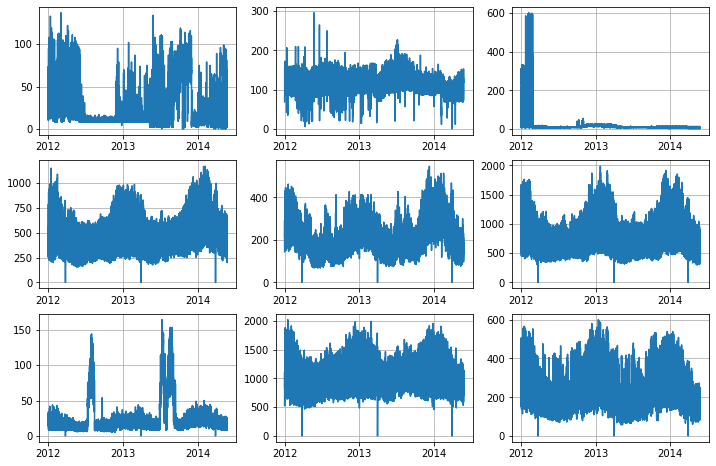

In [9]:
date_formater = matplotlib.dates.DateFormatter('%Y')

fig = plt.figure(figsize=(12,8))
for idx, entry in enumerate(islice(dataset.train, 9)):
    ax = plt.subplot(3, 3, idx+1)
    t = pd.date_range(start=entry["start"], periods=len(entry["target"]), freq=entry["start"].freq)
    plt.plot(t, entry["target"])
    plt.xticks(pd.date_range(start=pd.to_datetime("2011-12-31"), periods=3, freq="AS"))
    ax.xaxis.set_major_formatter(date_formater)
    plt.grid()

In [10]:
from gluonts.model.seasonal_naive import SeasonalNaivePredictor

In [11]:
predictor_naive = SeasonalNaivePredictor(
    freq=dataset.metadata.freq,
    prediction_length=dataset.metadata.prediction_length,
    season_length=7 * 24,
)

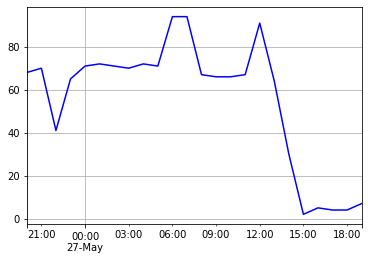

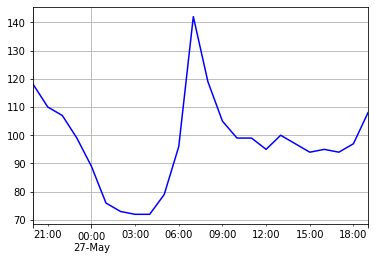

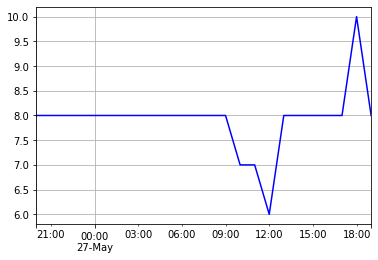

In [12]:
forecasts = predictor_naive.predict(dataset.train)

for entry, f in islice(zip(dataset.train, iter(forecasts)), 3):
    plt.figure()
    f.plot()
    plt.grid()
    plt.title(f.item_id)

In [13]:
from gluonts.evaluation.backtest import backtest_metrics

In [14]:
aggregate_metrics_naive, entrywise_metrics_naive = backtest_metrics(dataset.test, predictor_naive)

Running evaluation: 100%|██████████| 2247/2247 [00:10<00:00, 212.52it/s]


In [15]:
aggregate_metrics_naive

{'MSE': 6539412.3058893345,
 'abs_error': 12484981.0,
 'abs_target_sum': 128632956.0,
 'abs_target_mean': 2385.272140631954,
 'seasonal_error': 189.49338196116761,
 'MASE': 1.0120614940357362,
 'MAPE': 0.11258480859651211,
 'sMAPE': 0.10134016857863765,
 'OWA': nan,
 'MSIS': 40.482459761429446,
 'QuantileLoss[0.1]': 5463945.0,
 'Coverage[0.1]': 0.3382102062008604,
 'QuantileLoss[0.2]': 7219204.0,
 'Coverage[0.2]': 0.3382102062008604,
 'QuantileLoss[0.3]': 8974463.0,
 'Coverage[0.3]': 0.3382102062008604,
 'QuantileLoss[0.4]': 10729721.999999998,
 'Coverage[0.4]': 0.3382102062008604,
 'QuantileLoss[0.5]': 12484981.0,
 'Coverage[0.5]': 0.3382102062008604,
 'QuantileLoss[0.6]': 14240240.0,
 'Coverage[0.6]': 0.3382102062008604,
 'QuantileLoss[0.7]': 15995499.0,
 'Coverage[0.7]': 0.3382102062008604,
 'QuantileLoss[0.8]': 17750758.0,
 'Coverage[0.8]': 0.3382102062008604,
 'QuantileLoss[0.9]': 19506016.999999996,
 'Coverage[0.9]': 0.3382102062008604,
 'RMSE': 2557.227464636131,
 'NRMSE': 1.072

In [16]:
entrywise_metrics_naive

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,...,QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.6],Coverage[0.6],QuantileLoss[0.7],Coverage[0.7],QuantileLoss[0.8],Coverage[0.8],QuantileLoss[0.9],Coverage[0.9]
0,NaN,2899.291667,1115.0,235.0,9.791667,8.031874,5.784245,8.102574,1.222743,NaN,...,1115.0,0.833333,895.6,0.833333,676.2,0.833333,456.8,0.833333,237.4,0.833333
1,NaN,61.750000,168.0,2499.0,104.125000,9.577165,0.730905,0.065916,0.068682,NaN,...,168.0,0.041667,200.8,0.041667,233.6,0.041667,266.4,0.041667,299.2,0.041667
2,NaN,0.000000,0.0,190.0,7.916667,8.673073,0.000000,0.000000,0.000000,NaN,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,NaN,1372.000000,636.0,10468.0,436.166667,48.398763,0.547535,0.058515,0.061622,NaN,...,636.0,0.208333,732.8,0.208333,829.6,0.208333,926.4,0.208333,1023.2,0.208333
4,NaN,667.458333,551.0,4087.0,170.291667,25.383302,0.904466,0.136074,0.139027,NaN,...,551.0,0.458333,570.0,0.458333,589.0,0.458333,608.0,0.458333,627.0,0.458333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,NaN,1345.208333,469.0,6671.0,277.958333,30.914619,0.632117,0.068122,0.078962,NaN,...,469.0,0.416667,549.2,0.416667,629.4,0.416667,709.6,0.416667,789.8,0.416667
2243,NaN,105.791667,187.0,1058.0,44.083333,31.192686,0.249791,0.184689,0.194205,NaN,...,187.0,0.375000,199.6,0.375000,212.2,0.375000,224.8,0.375000,237.4,0.375000
2244,NaN,102110.666667,6654.0,50192.0,2091.333333,267.793565,1.035312,0.145354,0.140493,NaN,...,6654.0,0.500000,6520.8,0.500000,6387.6,0.500000,6254.4,0.500000,6121.2,0.500000
2245,NaN,1871.291667,621.0,10581.0,440.875000,169.860660,0.152331,0.057741,0.057534,NaN,...,621.0,0.500000,603.6,0.500000,586.2,0.500000,568.8,0.500000,551.4,0.500000


In [17]:
itemwise_metrics_naive = entrywise_metrics_naive.groupby("item_id")

In [18]:
itemwise_metrics_naive.get_group(42)

KeyError: 42

## 3. Bring your own model with PyTorch

### Probabilistic feed-forward network

In [ ]:
import torch
import torch.nn as nn

We will use a pretty simple model, based on a feed-forward network whose output layer produces the parameters of a Student's t-distribution at each time step in the prediction range. We will define two networks based on this idea:
* The `TrainingFeedForwardNetwork` computes the loss associated with given observations, i.e. the negative log-likelihood of the observations according to the output distribution; this will be used during training.
* The `SamplingFeedForwardNetwork` will be used at inference time: this uses the output distribution to draw a sample of a given size, as a way to encode the predicted distribution.

In [ ]:
def mean_abs_scaling(context, min_scale=1e-5):
    return context.abs().mean(1).clamp(min_scale, None).unsqueeze(1)

In [ ]:
def no_scaling(context):
    return torch.ones(context.shape[0], 1)

In [ ]:
class TrainingFeedForwardNetwork(nn.Module):
    distr_type = torch.distributions.StudentT
    
    def __init__(
        self,
        prediction_length: int,
        context_length: int,
        hidden_dimensions: List[int],
        batch_norm: bool=False,
        scaling: Callable=mean_abs_scaling,
    ) -> None:
        super().__init__()
        
        assert prediction_length > 0
        assert context_length > 0
        assert len(hidden_dimensions) > 0
        
        self.prediction_length = prediction_length
        self.context_length = context_length
        self.hidden_dimensions = hidden_dimensions
        self.batch_norm = batch_norm
        self.scaling = scaling
        
        dimensions = [context_length] + hidden_dimensions[:-1]

        modules = []
        for in_size, out_size in zip(dimensions[:-1], dimensions[1:]):
            modules += [self.__make_lin(in_size, out_size), nn.ReLU()]
            if batch_norm:
                modules.append(nn.BatchNorm1d(units))
        modules.append(self.__make_lin(dimensions[-1], prediction_length * hidden_dimensions[-1]))
        self.nn = nn.Sequential(*modules)
        
        self.df_proj = nn.Sequential(self.__make_lin(hidden_dimensions[-1], 1), nn.Softplus())
        self.loc_proj = self.__make_lin(hidden_dimensions[-1], 1)
        self.scale_proj = nn.Sequential(self.__make_lin(hidden_dimensions[-1], 1), nn.Softplus())
    
    @staticmethod
    def __make_lin(dim_in, dim_out):
        lin = nn.Linear(dim_in, dim_out)
        torch.nn.init.uniform_(lin.weight, -0.07, 0.07)
        torch.nn.init.zeros_(lin.bias)
        return lin
    
    def distr_and_scale(self, context):
        scale = self.scaling(context)
        scaled_context = context / scale
        nn_out = self.nn(scaled_context)
        nn_out_reshaped = nn_out.reshape(-1, self.prediction_length, self.hidden_dimensions[-1])
        
        distr_args = (
            2.0 + self.df_proj(nn_out_reshaped).squeeze(dim=-1),
            self.loc_proj(nn_out_reshaped).squeeze(dim=-1),
            self.scale_proj(nn_out_reshaped).squeeze(dim=-1),
        )
        distr = net.distr_type(*distr_args)
        
        return distr, scale
    
    def forward(self, context, target):
        assert context.shape[-1] == self.context_length
        assert target.shape[-1] == self.prediction_length
        
        distr, scale = self.distr_and_scale(context)
        loss = (-distr.log_prob(target / scale) + torch.log(scale)).mean(dim=1)
        
        return loss

In [ ]:
class SamplingFeedForwardNetwork(TrainingFeedForwardNetwork):
    def __init__(self, *args, num_samples: int = 1000, **kwargs):
        super().__init__(*args, **kwargs)
        self.num_samples = num_samples
        
    def forward(self, context):
        assert context.shape[-1] == self.context_length
        
        distr, scale = self.distr_and_scale(context)
        sample = distr.sample((self.num_samples, )) * scale
        
        return sample.permute(1, 0, 2)

We can now instantiate the training network, and explore its set of parameters.

In [ ]:
context_length = 2 * 7 * 24
prediction_length = dataset.metadata.prediction_length
hidden_dimensions = [96, 48]

In [ ]:
batch_size = 32
num_batches_per_epoch = 100

In [ ]:
net = TrainingFeedForwardNetwork(
    prediction_length=prediction_length,
    context_length=context_length,
    hidden_dimensions=hidden_dimensions,
    batch_norm=False,
    scaling=mean_abs_scaling,
)

In [ ]:
sum(np.prod(p.shape) for p in net.parameters())

In [ ]:
for p in net.parameters():
    print(p.shape)

### Defining the training data loader

We now set up the data loader which will yield batches of data to train on. Starting from the original dataset, the data loader is configured to apply the following transformation, which does essentially two things:
* Replaces `nan`s in the target field with a dummy value (zero), and adds a field indicating which values were actually observed vs imputed this way.
* Slices out training instances of a fixed length randomly from the given dataset; these will be stacked into batches by the data loader itself.

In [ ]:
from gluonts.dataset.field_names import FieldName
from gluonts.dataset.loader import TrainDataLoader
from gluonts.torch.batchify import batchify
from gluonts.torch.support.util import copy_parameters
from gluonts.torch.model.predictor import PyTorchPredictor
from gluonts.transform import Chain, AddObservedValuesIndicator, InstanceSplitter, ExpectedNumInstanceSampler

In [ ]:
transformation = Chain([
    AddObservedValuesIndicator(
        target_field=FieldName.TARGET,
        output_field=FieldName.OBSERVED_VALUES,
    ),
    InstanceSplitter(
        target_field=FieldName.TARGET,
        is_pad_field=FieldName.IS_PAD,
        start_field=FieldName.START,
        forecast_start_field=FieldName.FORECAST_START,
        train_sampler=ExpectedNumInstanceSampler(num_instances=1),
        past_length=context_length,
        future_length=prediction_length,
        time_series_fields=[FieldName.OBSERVED_VALUES],
    ),
])

In [ ]:
data_loader = TrainDataLoader(
    dataset.train,
    batch_size=batch_size,
    stack_fn=batchify,
    transform=transformation,
    num_batches_per_epoch=num_batches_per_epoch
)

### Train the model

We can now train the model using any of the available optimizers from PyTorch:

In [ ]:
optimizer = torch.optim.Adam(net.parameters())

for epoch_no in range(10):
    sum_epoch_loss = 0.0
    for batch_no, batch in enumerate(data_loader, start=1):
        optimizer.zero_grad()

        loss_vec = net(context=batch["past_target"], target=batch["future_target"])
        loss = loss_vec.mean()
        loss.backward()
        
        optimizer.step()
        
        sum_epoch_loss += loss.detach().numpy().item()
        
    print(f"{epoch_no}: {sum_epoch_loss / num_batches_per_epoch}")

### Create predictor out of the trained model, and test it

We now have a trained model, whose parameters can be copied over to a `SamplingFeedForwardNetwork` object: we will wrap this into a `PyTorchPredictor` that can be used for inference tasks.

In [ ]:
pred_net = SamplingFeedForwardNetwork(
    prediction_length=net.prediction_length,
    context_length=net.context_length,
    hidden_dimensions=net.hidden_dimensions,
    batch_norm=net.batch_norm,
)
copy_parameters(net, pred_net)

predictor_pytorch = PyTorchPredictor(
    prediction_length=prediction_length, freq = dataset.metadata.freq, 
    input_names = ["past_target"], prediction_net=pred_net, batch_size=32, input_transform=transformation,
    device=None
)

For example, we can do backtesting on the test dataset: in what follows, `make_evaluation_predictions` will slice out the trailing `prediction_length` observations from the test time series, and use the given predictor to obtain forecasts for the same time range.

In [ ]:
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

In [ ]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset.test,
    predictor=predictor_pytorch,
    num_samples=1000,
)

forecasts_pytorch = list(forecast_it)
tss_pytorch = list(ts_it)

Once we have the forecasts, we can plot them:

In [ ]:
plt.figure(figsize=(20, 15))
date_formater = matplotlib.dates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 15})

for idx, (forecast, ts) in islice(enumerate(zip(forecasts_pytorch, tss_pytorch)), 9):
    ax =plt.subplot(3, 3, idx+1)
    
    plt.plot(ts[-5 * prediction_length:], label="target")
    forecast.plot()
    plt.xticks(rotation=60)
    ax.xaxis.set_major_formatter(date_formater)
    
plt.gcf().tight_layout()
plt.legend()
plt.show()

And we can compute evaluation metrics, that summarize the performance of the model on our test data.

In [ ]:
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])

In [ ]:
aggregate_metrics_pytorch, entrywise_metrics_pytorch = evaluator(
    iter(tss_pytorch), iter(forecasts_pytorch), num_series=len(dataset.test)
)
pd.DataFrame.from_records(aggregate_metrics_pytorch, index=["FeedForward"]).transpose()

## 4. Training pre-implemented models

In [ ]:
from gluonts.model.seq2seq import MQCNNEstimator
from gluonts.mx.trainer import Trainer

In [ ]:
estimator_mqcnn = MQCNNEstimator(
    freq=dataset.metadata.freq,
    prediction_length=dataset.metadata.prediction_length,
    quantiles=[0.1, 0.5, 0.9],
    trainer=Trainer(epochs=30),
)

In [ ]:
predictor_mqcnn = estimator_mqcnn.train(dataset.train)

In [ ]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset.test,
    predictor=predictor_mqcnn,
    num_samples=1000,
)

forecasts_mqcnn = list(forecast_it)
tss_mqcnn = list(ts_it)

In [ ]:
plt.figure(figsize=(20, 15))
date_formater = matplotlib.dates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 15})

for idx, (forecast, ts) in islice(enumerate(zip(forecasts_mqcnn, tss_mqcnn)), 9):
    ax = plt.subplot(3, 3, idx+1)
    
    plt.plot(ts[-5 * prediction_length:], label="target")
    forecast.plot()
    plt.xticks(rotation=60)
    ax.xaxis.set_major_formatter(date_formater)
    
plt.gcf().tight_layout()
plt.legend()
plt.show()

In [ ]:
aggregate_metrics_mqcnn, entrywise_metrics_mqcnn = evaluator(
    iter(tss_mqcnn), iter(forecasts_mqcnn), num_series=len(dataset.test)
)

In [ ]:
pd.DataFrame.from_records(
    [aggregate_metrics_naive, aggregate_metrics_pytorch, aggregate_metrics_mqcnn],
    index=["Naive", "FeedForward", "MQCNN"]
).transpose()

## 5. Additional features

TODO: give an overview of what else is there that we couldn't show

* lots of other models
* temporal point processes
* model productization (enablers for SageMaker training and inference of models)